1. Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
df=pd.read_excel('glass.xlsx',sheet_name="glass")

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.shape,df.columns

((214, 10),
 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:

# Remove rows with NaN values
df = df.dropna()

# Write the cleaned DataFrame back to a new CSV file
df.to_csv('cleaned_file.csv', index=False)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

2: Data Visualization:

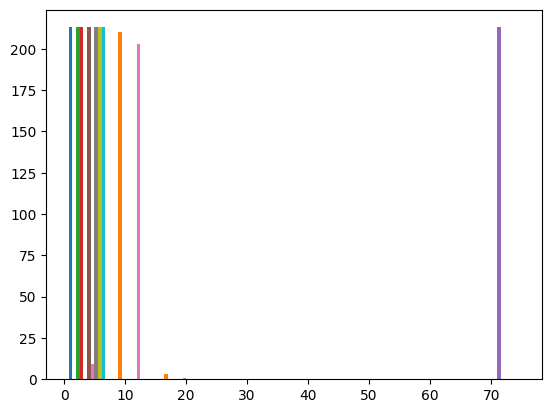

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df)
plt.show()

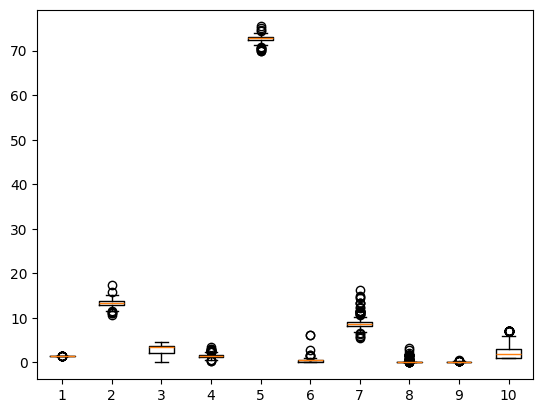

In [ ]:
plt.boxplot(df)
plt.show()

In [ ]:
## outlier capping
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_extreme=q1-1.5*IQR
    upper_extreme=q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if  x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']):
    outlier_capping(df,col)

<Axes: >

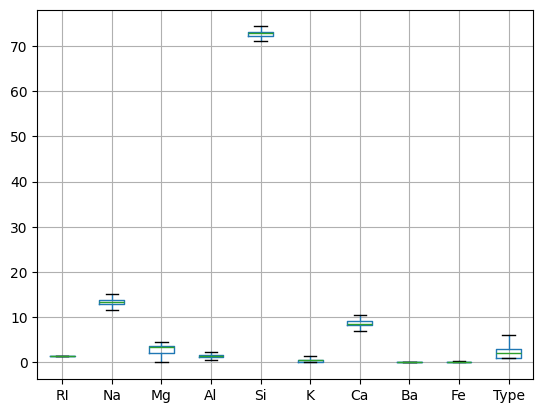

In [ ]:
df.boxplot()

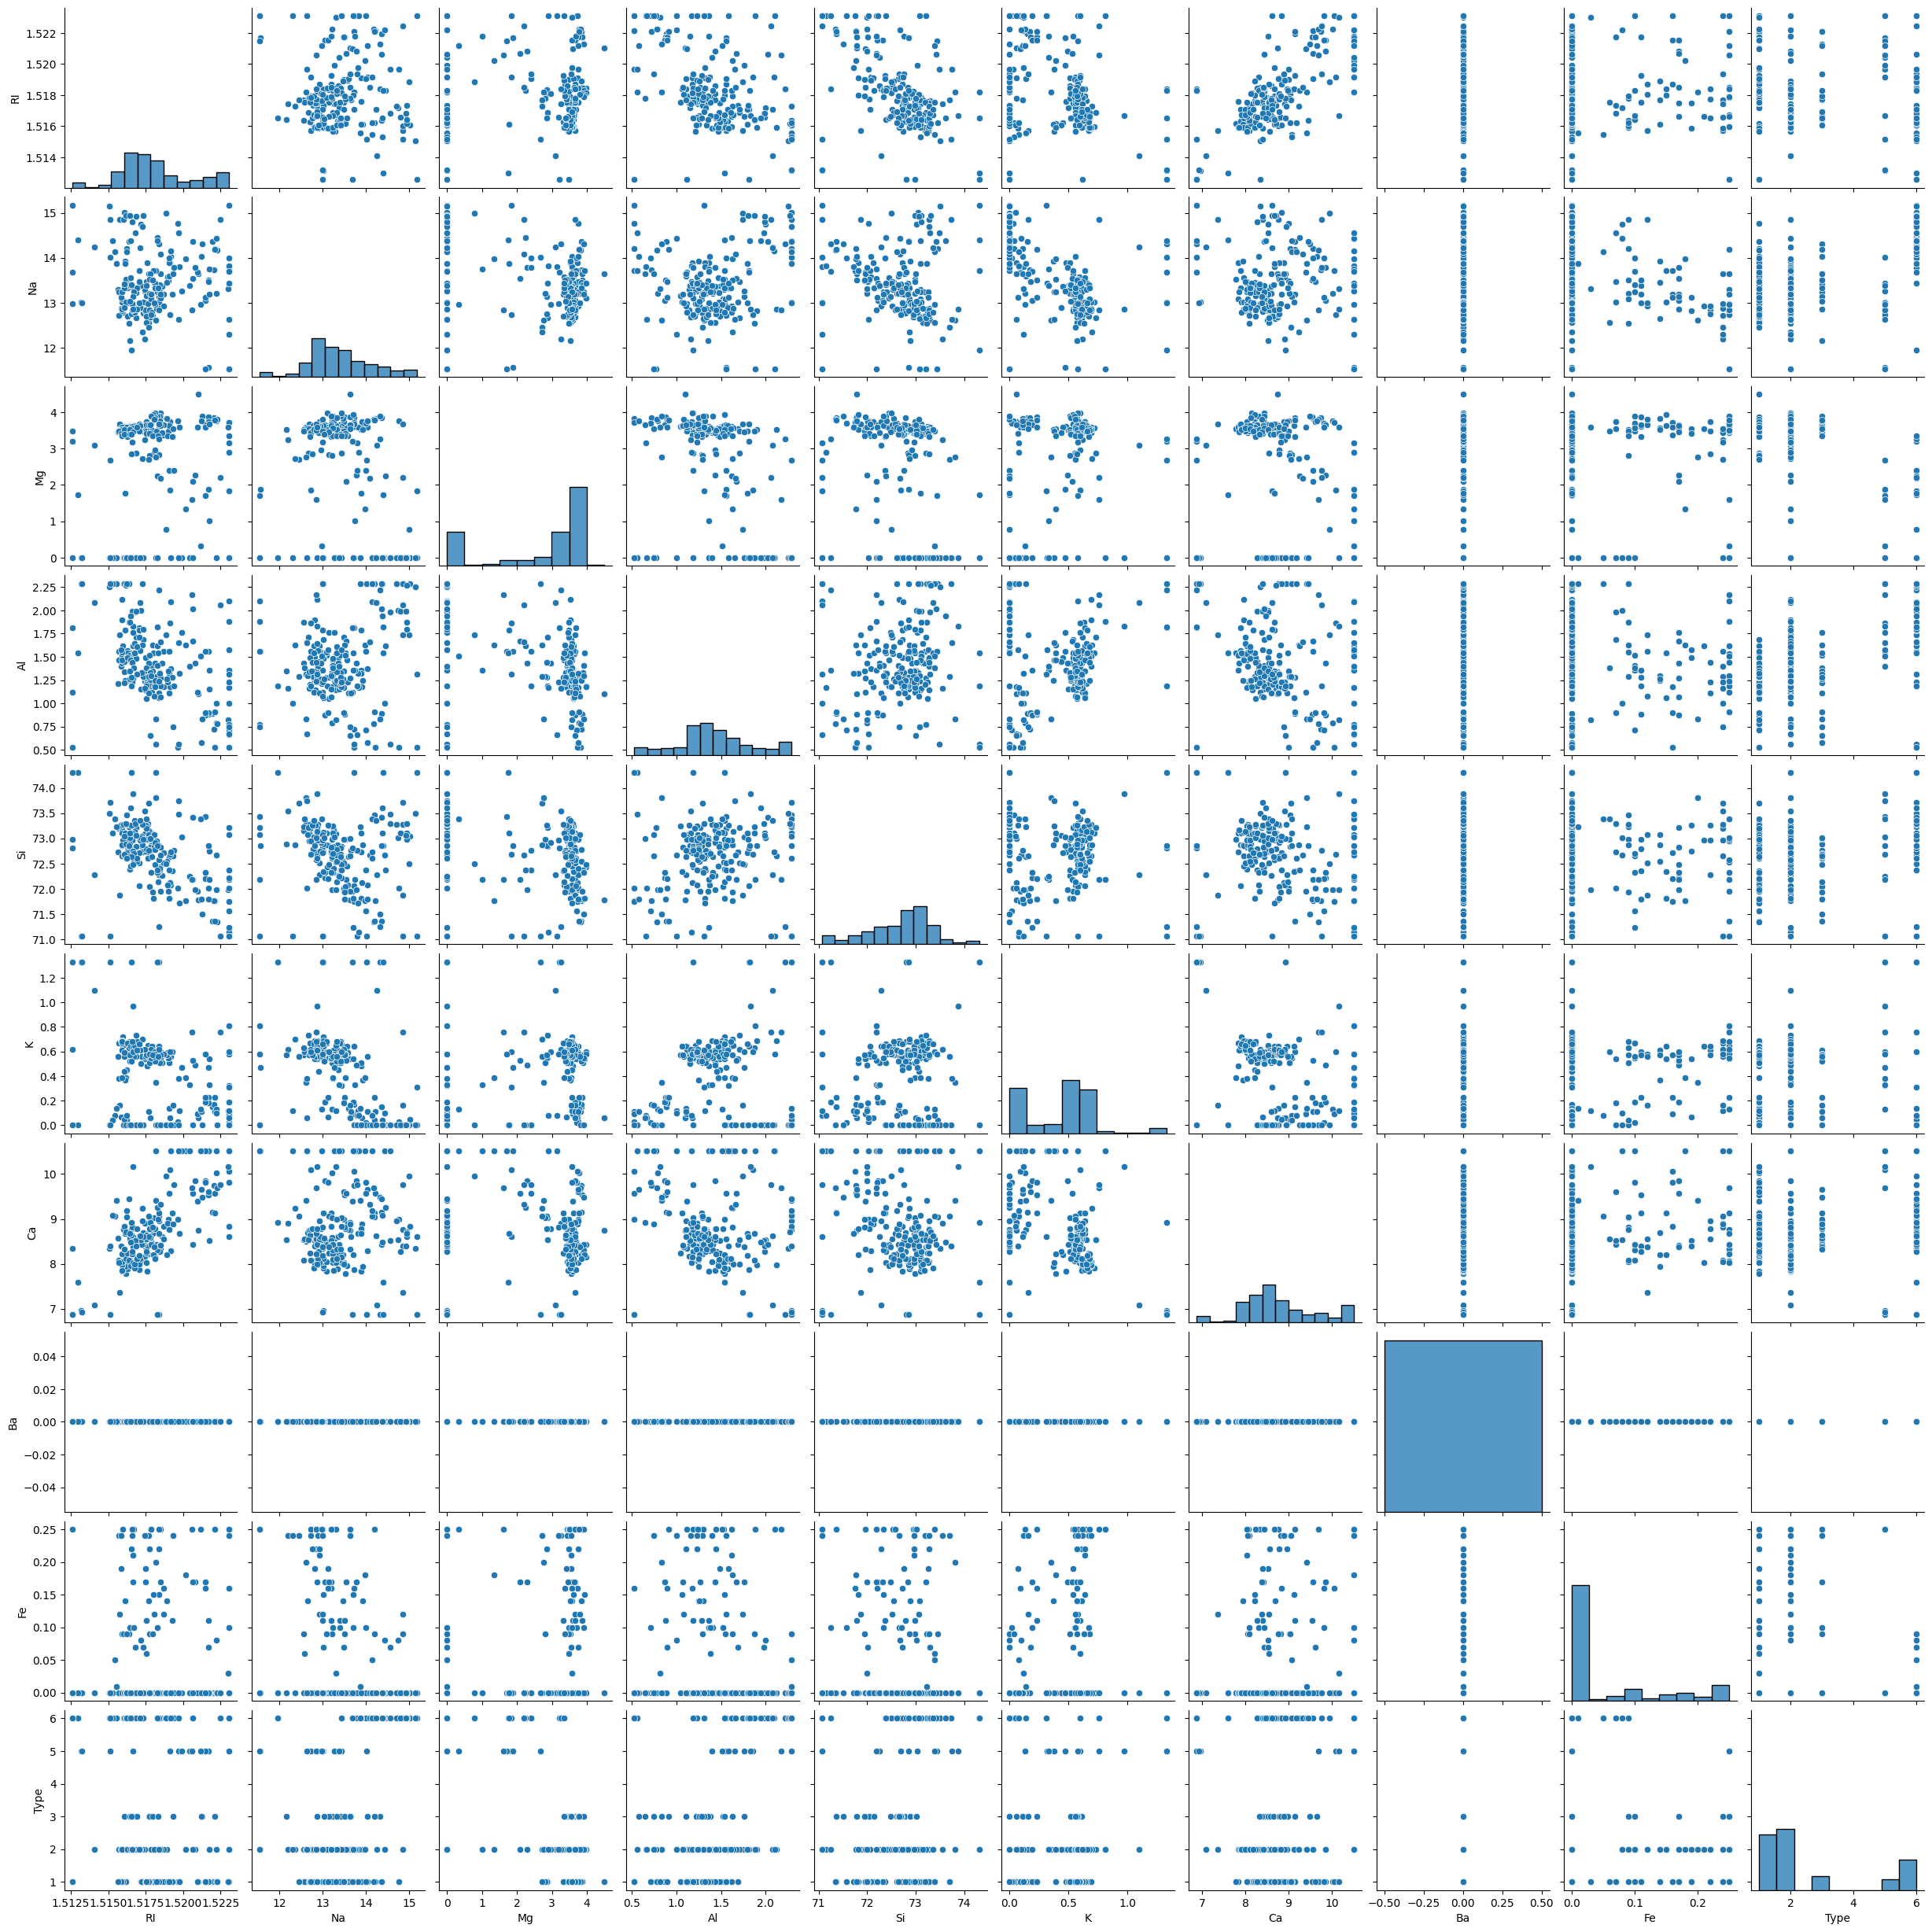

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.072901,-0.038895,-0.461848,-0.526911,-0.339382,0.760626,NaN,0.100217,-0.155095
Na,-0.072901,1.000000,-0.300589,0.223172,-0.158794,-0.492717,-0.103610,NaN,-0.249138,0.503702
Mg,-0.038895,-0.300589,1.000000,-0.472330,-0.206544,0.334363,-0.372089,NaN,0.104381,-0.739870
Al,-0.461848,0.223172,-0.472330,1.000000,0.130631,0.173969,-0.277706,NaN,-0.096567,0.585616
Si,-0.526911,-0.158794,-0.206544,0.130631,1.000000,-0.040748,-0.188686,NaN,-0.068593,0.166276
K,-0.339382,-0.492717,0.334363,0.173969,-0.040748,1.000000,-0.497856,NaN,0.076522,-0.243427
Ca,0.760626,-0.103610,-0.372089,-0.277706,-0.188686,-0.497856,1.000000,NaN,0.106853,0.073455
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.100217,-0.249138,0.104381,-0.096567,-0.068593,0.076522,0.106853,NaN,1.000000,-0.219217
Type,-0.155095,0.503702,-0.739870,0.585616,0.166276,-0.243427,0.073455,NaN,-0.219217,1.000000


3.Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6.0


In [ ]:
x=df.drop('Type',axis=1)
y=df['Type']
x,y

(          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
 ..       ...    ...   ...   ...    ...   ...   ...  ...  ...
 209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0  0.0
 
 [213 rows x 9 columns],
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 209    6.0
 210    6.0
 211    6.0
 212    6.0
 213    6.0
 Name: Type, Length: 213, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape

((170, 9), (170,))

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train,y_train

(array([[-1.05776358, -0.76547959,  0.53794711, ..., -0.98767689,
          0.        , -0.61058028],
        [ 1.61102409,  1.05119864,  0.72707583, ...,  0.37631501,
          0.        ,  2.34496206],
        [ 2.03570193, -2.57532821, -2.02256475, ...,  1.97929694,
          0.        , -0.61058028],
        ...,
        [-1.06638648, -0.24642867,  0.40701184, ..., -0.69622563,
          0.        , -0.61058028],
        [-2.32101849,  1.33804258, -0.75685718, ..., -1.4306828 ,
          0.        , -0.61058028],
        [ 2.03570193,  0.51848849,  0.2688024 , ...,  1.97929694,
          0.        , -0.61058028]]),
 80     2.0
 162    3.0
 110    2.0
 128    2.0
 96     2.0
       ... 
 107    2.0
 14     1.0
 93     2.0
 180    6.0
 103    2.0
 Name: Type, Length: 170, dtype: float64)

4: Random Forest Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels of the test set
y_pred = clf.predict(x_train)
y_pred

array([2., 3., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 6., 2., 5., 1.,
       1., 2., 1., 6., 5., 2., 1., 2., 6., 1., 1., 1., 1., 1., 2., 2., 3.,
       1., 2., 5., 2., 1., 3., 2., 2., 1., 2., 2., 2., 1., 2., 1., 3., 2.,
       2., 2., 2., 1., 6., 1., 1., 2., 2., 1., 1., 6., 6., 1., 1., 2., 6.,
       3., 1., 1., 2., 3., 2., 3., 2., 1., 1., 2., 3., 6., 1., 6., 5., 2.,
       5., 1., 1., 2., 1., 2., 1., 6., 3., 2., 1., 6., 1., 2., 5., 1., 3.,
       1., 2., 1., 2., 6., 5., 6., 1., 2., 1., 1., 2., 2., 2., 6., 6., 2.,
       1., 1., 1., 6., 2., 1., 5., 2., 6., 2., 6., 6., 1., 1., 2., 1., 5.,
       6., 5., 1., 1., 2., 1., 1., 3., 6., 6., 2., 1., 3., 6., 1., 1., 3.,
       2., 3., 2., 2., 2., 2., 2., 2., 6., 1., 6., 2., 2., 1., 2., 6., 2.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(x_test))
print("Accuracy:", accuracy)

Accuracy: 0.5348837209302325


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, clf.predict(x_train))
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_train)

'              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00        59\n         2.0       1.00      1.00      1.00        61\n         3.0       1.00      1.00      1.00        14\n         5.0       1.00      1.00      1.00        10\n         6.0       1.00      1.00      1.00        26\n\n    accuracy                           1.00       170\n   macro avg       1.00      1.00      1.00       170\nweighted avg       1.00      1.00      1.00       170\n'

5: Bagging and Boosting Methods

In [ ]:
# Bagging: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)


Random Forest Classifier Accuracy: 0.5348837209302325


In [ ]:
# Boosting: AdaBoost Classifier
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(x_train, y_train)
adb_pred = adb_clf.predict(x_test)
adb_accuracy = accuracy_score(y_test, adb_pred)
print("AdaBoost Classifier Accuracy:", adb_accuracy)

AdaBoost Classifier Accuracy: 0.4418604651162791


# Questions:

**1. Explain Bagging and Boosting methods. How is it different from each other.**

**Bagging builds multiple models using different random samples of the training data. Each model is trained independently, and their results are averaged

**Boosting builds models sequentially. Each new model focuses on correcting the errors made by previous ones. It assigns higher weights to misclassified instances to improve performance.

Bagging trains models independently in parallel, while Boosting trains them sequentially, where each model learns from the mistakes of the previous one.

**2. Explain how to handle imbalance in the data.**

Imbalanced data means one class occurs much more frequently than others. It can bias the model toward the majority class.

We can also use algorithms that handle imbalance, apply special metrics like F1-score or ROC-AUC, or give higher penalty to misclassifying the minority class.